# Classification


In [97]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from matplotlib.colors import ListedColormap
from patsy import dmatrices
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [28]:
%matplotlib inline

In [29]:
# PATH = "./"
PATH = "./classification/"

## Ex. 11

In [30]:
df = pd.read_csv(f'{PATH}Auto.csv')
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [31]:
model = sm.OLS.from_formula("mpg ~ year", data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.336
Method:                 Least Squares   F-statistic:                     201.8
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           2.77e-37
Time:                        10:41:15   Log-Likelihood:                -1297.7
No. Observations:                 397   AIC:                             2599.
Df Residuals:                     395   BIC:                             2607.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -70.2001      6.605    -10.628      0.000     -83.186     -57.214
year           1.2332      0.087     14.205      0.000       1.063       1.404
==============================================================================
Omnibus:                       22.297   Durbin-Watson:                   0.772
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.960
Skew:                           0.379   Prob(JB):                     0.000342
Kurtosis:                       2.376   Cond. No.                     1.57e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
df_cat = df.astype({'year': 'category'})
df_cat.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower        object
weight             int64
acceleration     float64
year            category
origin             int64
name              object
dtype: object

In [33]:
model = sm.OLS.from_formula("mpg ~ year", data=df_cat)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.414
Method:                 Least Squares   F-statistic:                     24.35
Date:                Mon, 09 Dec 2019   Prob (F-statistic):           2.41e-40
Time:                        10:41:21   Log-Likelihood:                -1267.3
No. Observations:                 397   AIC:                             2561.
Df Residuals:                     384   BIC:                             2612.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.6897      1.112     15.907      0.000      15.503      19.876
year[T.71]     3.5603      1.587      2.244      0.025       0.441       6.680
year[T.72]     1.0246      1.587      0.646      0.519      -2.095       4.144
year[T.73]    -0.5897      1.461     -0.404      0.687      -3.461       2.282
year[T.74]     5.0140      1.602      3.131      0.002       1.865       8.163
year[T.75]     2.5770      1.560      1.652      0.099      -0.489       5.643
year[T.76]     3.8839      1.514      2.566      0.011       0.907       6.860
year[T.77]     5.6853      1.587      3.583      0.000       2.566       8.805
year[T.78]     6.3715      1.494      4.264      0.000       3.433       9.310
year[T.79]     7.4034      1.573      4.707      0.000       4.311      10.496
year[T.80]    16.0069      1.573     10.178      0.000      12.915      19.099
year[T.81]    12.6448      1.573      8.040      0.000       9.553      15.737
year[T.82]    14.3103      1.560      9.176      0.000      11.244      17.377
==============================================================================
Omnibus:                       21.680   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               13.927
Skew:                           0.324   Prob(JB):                     0.000946
Kurtosis:                       2.350   Cond. No.                         14.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Ex. 12

In [34]:
df_credit = pd.read_csv(f'{PATH}Credit.csv')
df_credit.head(5)

Unnamed: 0   Income  Limit  Rating  Cards  Age  Education  Gender Student  \
0           1   14.891   3606     283      2   34         11    Male      No   
1           2  106.025   6645     483      3   82         15  Female     Yes   
2           3  104.593   7075     514      4   71         11    Male      No   
3           4  148.924   9504     681      3   36         11  Female      No   
4           5   55.882   4897     357      2   68         16    Male      No   

  Married  Ethnicity  Balance  
0     Yes  Caucasian      333  
1     Yes      Asian      903  
2      No      Asian      580  
3      No      Asian      964  
4     Yes  Caucasian      331

In [35]:
df_credit = df_credit.drop(['Unnamed: 0'],axis=1)
df_credit.head(5)

Income  Limit  Rating  Cards  Age  Education  Gender Student Married  \
0   14.891   3606     283      2   34         11    Male      No     Yes   
1  106.025   6645     483      3   82         15  Female     Yes     Yes   
2  104.593   7075     514      4   71         11    Male      No      No   
3  148.924   9504     681      3   36         11  Female      No      No   
4   55.882   4897     357      2   68         16    Male      No     Yes   

   Ethnicity  Balance  
0  Caucasian      333  
1      Asian      903  
2      Asian      580  
3      Asian      964  
4  Caucasian      331

In [36]:
df_credit.dtypes

Income       float64
Limit          int64
Rating         int64
Cards          int64
Age            int64
Education      int64
Gender        object
Student       object
Married       object
Ethnicity     object
Balance        int64
dtype: object

In [40]:
df_credit = pd.get_dummies(df_credit, columns=["Gender", "Student", "Married", "Ethnicity"])

KeyError: "None of [Index(['Gender', 'Student', 'Married', 'Ethnicity'], dtype='object')] are in the [columns]"

In [41]:
df_credit["Income_50"] = (df_credit["Income"] > 50).astype('int')
df_credit.head(5)

Income  Limit  Rating  Cards  Age  Education  Balance  Gender_Female  \
0   14.891   3606     283      2   34         11      333              0   
1  106.025   6645     483      3   82         15      903              1   
2  104.593   7075     514      4   71         11      580              0   
3  148.924   9504     681      3   36         11      964              1   
4   55.882   4897     357      2   68         16      331              0   

   Gender_Male  Student_No  Student_Yes  Married_No  Married_Yes  \
0            1           1            0           0            1   
1            0           0            1           0            1   
2            1           1            0           1            0   
3            0           1            0           1            0   
4            1           1            0           0            1   

   Ethnicity_African American  Ethnicity_Asian  Ethnicity_Caucasian  Income_50  
0                           0                0                    1          0  
1                           0                1                    0          1  
2                           0                1                    0          1  
3                           0                1                    0          1  
4                           0                0                    1          1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7deac73b90>,
      dtype=object)

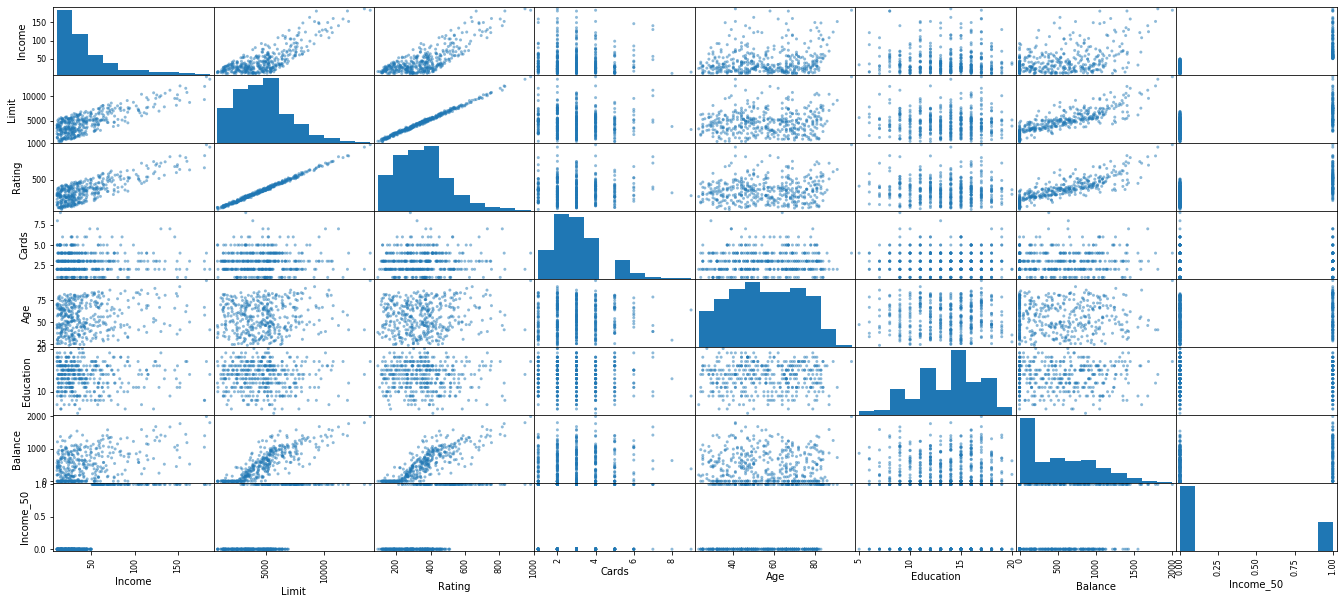

In [12]:
plt.rcParams["figure.figsize"] = [23, 10]
pd.plotting.scatter_matrix(df_credit)

In [42]:
# df_credit.boxplot(column="Income", by="Married"), df_credit.boxplot(column="Income", by="Student")

In [43]:
df_credit_train, df_credit_valid = train_test_split(df_credit, test_size=0.20, random_state=123)

In [82]:
formula = "Income_50 ~ Limit + Balance + Student_No"

In [83]:
y_train, X_train = dmatrices(formula, data=df_credit_train, return_type='dataframe')   
y_valid, X_valid = dmatrices(formula, data=df_credit_valid, return_type='dataframe')

In [84]:
model_income = sm.Logit(y_train, X_train)
result_income = model_income.fit()
result_income.summary()

Optimization terminated successfully.
         Current function value: 0.084093
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Income_50   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Mon, 09 Dec 2019   Pseudo R-squ.:                  0.8629
Time:                        10:58:06   Log-Likelihood:                -26.910
converged:                       True   LL-Null:                       -196.32
Covariance Type:            nonrobust   LLR p-value:                 3.943e-73
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.0902      3.340     -5.416      0.000     -24.637     -11.543
Limit          0.0095      0.002      5.531      0.000       0.006       0.013
Balance       -0.0316      0.006     -5.361      0.000      -0.043      -0.020
Student_No   -14.2680      2.897     -4.924      0.000     -19.947      -8.589
==============================================================================

Possibly complete quasi-separation: A fraction 0.40 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [85]:
# sklearn output, set  C = 1e9 to avoid regularization
model_ski = LogisticRegression(C = 1e9)
y_train = np.array(y_train).reshape(len(y_train,))
result_ski = model_ski.fit(X_train, y_train)


/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [86]:
print("Training accuracy: ", model_ski.score(X_train, y_train))
print("Validation accuracy: ", model_ski.score(X_valid, y_valid))
print("Confusion matrix: ", confusion_matrix(y_valid, model_ski.predict(X_valid)))

Training accuracy:  0.978125
Validation accuracy:  0.925
Confusion matrix:  [[49  4]
 [ 2 25]]


In [87]:
card_formula = "Cards ~ Income + Limit"

In [88]:
y_card_train, X_card_train = dmatrices(card_formula, data=df_credit_train, return_type='dataframe')   
y_card_valid, X_card_valid = dmatrices(card_formula, data=df_credit_valid, return_type='dataframe')

In [89]:
model_card = LogisticRegression(fit_intercept = False, C = 1e9)
y_card_train = np.array(y_card_train).reshape(len(y_card_train,))
result_card = model_card.fit(X_card_train, y_card_train)

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [90]:
print("Training accuracy: ", model_card.score(X_card_train, y_card_train))
print("Validation accuracy: ", model_card.score(X_card_valid, y_card_valid))
print("Confusion matrix: ", confusion_matrix(y_card_valid, model_card.predict(X_card_valid)))


Training accuracy:  0.365625
Validation accuracy:  0.1375
Confusion matrix:  [[ 0 13  2  0  0  0]
 [ 0  9  5  0  0  0]
 [ 0 27  2  1  0  0]
 [ 0  8  3  0  0  0]
 [ 0  6  2  0  0  0]
 [ 0  1  1  0  0  0]]


## Ex. 13

In [91]:
def grid_search(estimator, params, no_folds, X, y):
    gridSearch = GridSearchCV(estimator, params, cv=10, n_jobs=2)
    gridSearch.fit(X,y)
    print('Best parameters: %s' % gridSearch.best_params_) 
    print('Best mean accuracy: %s' %gridSearch.best_score_)

In [92]:
y_income, X_income = dmatrices(formula, data=df_credit, return_type='dataframe')
# col = list(df_credit.columns)
# col.remove("Income_50")
# col.remove("Income")
# X_income = df_credit[col]
# y_income = df_credit["Income_50"]
# y_income = np.array(y_income).reshape(len(y_income,))
y_income = np.array(y_income).ravel()
n_folds = 5
params_Logit = {"C" : [1e9, 1e8, 1e7, 1e6, 1e5, 1e4, 1e3, 100, 10, 1]}
grid_search(LogisticRegression(), params_Logit, n_folds, X_income, y_income)
params_KNN = {"n_neighbors": range(1,10)}
grid_search(KNeighborsClassifier(), params_KNN, n_folds, X_income, y_income)
params_DTC = {"max_depth": range(1,15)}
grid_search(DecisionTreeClassifier(), params_DTC, n_folds, X_income, y_income)

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
Best parameters: {'C': 10}
Best mean accuracy: 0.9725
/usr/local/lib64/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
Best parameters: {'n_neighbors': 1}
Best mean accuracy: 0.94
Best parameters: {'max_depth': 5}
Best mean accuracy: 0.925
/usr/local/lib64/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [68]:
# y_card, X_card = dmatrices(card_formula, data=df_credit, return_type='dataframe')
col = list(df_credit.columns)
col.remove("Cards")
col.remove("Income")
y_card = df_credit["Cards"]
y_card = np.array(y_card).reshape(len(y_card,))
grid_search(LogisticRegression(), params_Logit, n_folds, X_card, y_card)
grid_search(KNeighborsClassifier(), params_KNN, n_folds, X_card, y_card)
grid_search(DecisionTreeClassifier(criterion='entropy'), params_DTC, n_folds, X_card, y_card)

/usr/local/lib64/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib64/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warnin

/usr/local/lib64/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


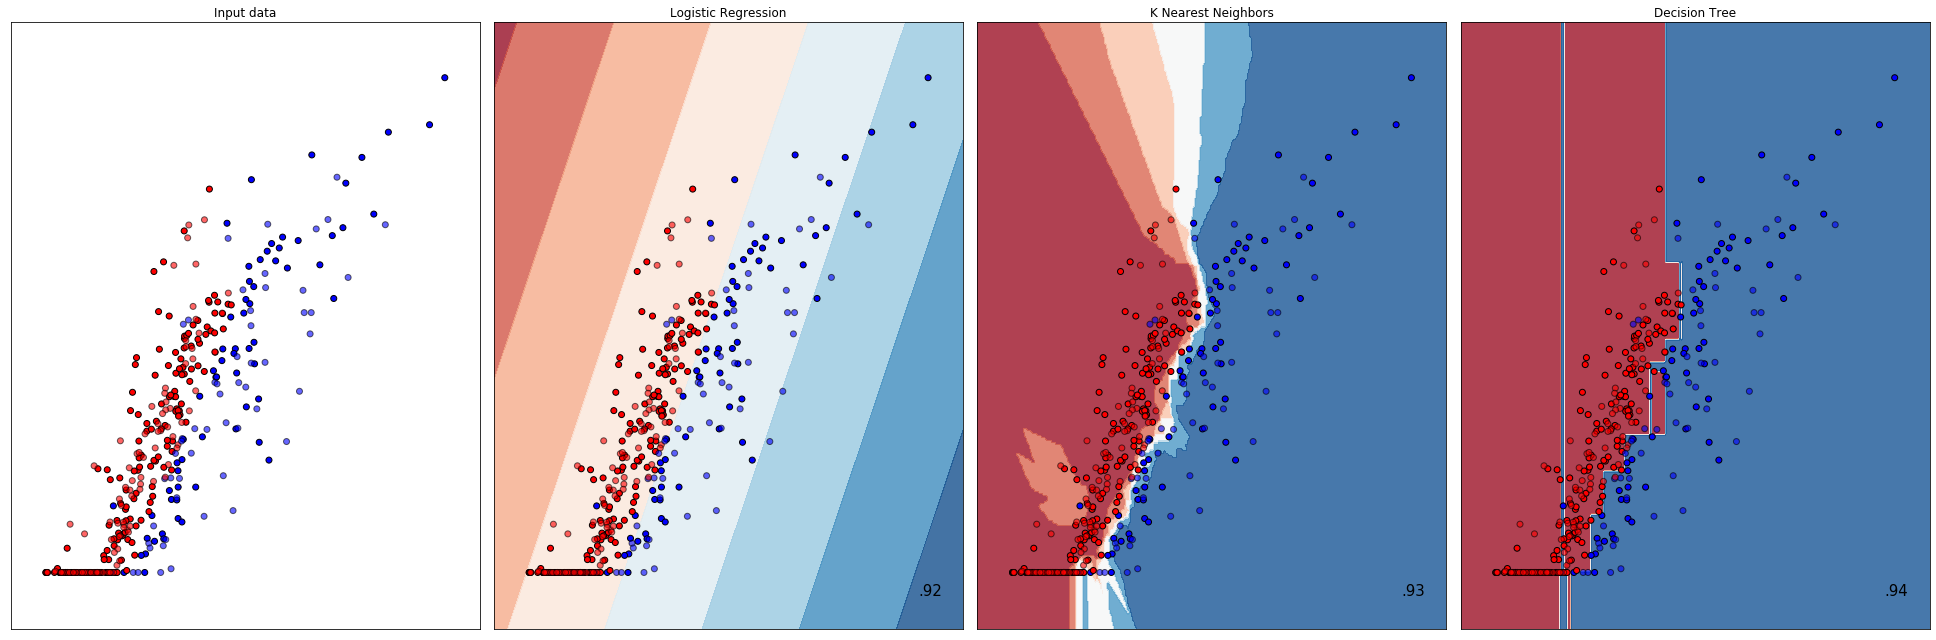

In [114]:
h = .02
names = ["Logistic Regression", "K Nearest Neighbors", "Decision Tree"]
classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(),
    DecisionTreeClassifier()
]

y_plot, X_plot = dmatrices("Income_50 ~ Limit + Balance - 1", data=df_credit, return_type='dataframe')
X_plot = np.array(X_plot)
y_plot = np.array(y_plot).ravel()
datasets = [(X_plot, y_plot)]

figure = plt.figure(figsize=(27, 9))
i = 1
for ds_cnt, ds in enumerate(datasets):
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()